In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import glob as glob
plt.style.use('fivethirtyeight')

In [31]:
imputed = "impute2_vcf/run1/snp50.chr20.imputed.vcf"
true = "accuracy_test/merged_refs/F250_HD_merged.chr10.vcf"

In [16]:
# truedict = {}
# trueids = []
# with open(true, "r") as t:
#     for line in t:
#         if not line.startswith("#"):
#             cp = (line.split("\t")[0], line.split("\t")[1])       #
#             pos = ":".join(cp)
#             gen = line.split("\t")[9:]
#             genotypes = [(x.split("/")) for x in gen]
#             intgt = [[int(y) for y in x if y != '.' and y != '.\n']for x in genotypes]
#             alt = [sum(x) for x in intgt]
#             truedict[pos] = alt
#         if line.startswith("#"):
#             trueids.append(line)
# samples = trueids[-1].split("\t")[9:]
# truedf = pd.DataFrame.from_dict(truedict, orient='index')
# truedf.columns = samples

In [17]:
# impdict = {}
# impids = []
# with open(imputed, "r") as i:
#     for line in i:
#         if not line.startswith("#"):
#             cp = (line.split("\t")[0], line.split("\t")[1])
#             pos = ":".join(cp)
#             gen = line.split("\t")[9:]
#             genotypes = [(x.split("/")) for x in gen]
#             intgt = [[int(y) for y in x if y != '.' and y != '.\n']for x in genotypes]
#             alt = [sum(x) for x in intgt]
#             impdict[pos] = alt
#         if line.startswith("#"):
#             impids.append(line)
# impsamples = impids[-1].split("\t")[9:]
# impdf = pd.DataFrame.from_dict(impdict, orient='index')
# impdf.columns = impsamples

In [7]:
corrs=impdf.corrwith(truedf, axis = 1)
cor = pd.DataFrame(corrs)
cor = cor.rename(index=str, columns={0:"correlation"})

In [8]:
outfile = "./test_correlations.txt"
assay = imputed.split("/")[1].strip(".vcf")
correlation = cor.mean()[0]

In [29]:
with open (outfile, 'a') as out:
    out.write(assay + "\t" + str(correlation)+"\n")

NameError: name 'outfile' is not defined

In [39]:
label = {'color':  'black',
        'weight': 'normal',
        'size': 10,
        }

In [40]:
title = {'color':  'black',
        'weight': 'normal',
        'size': 12,
        }

In [41]:
correlations = "./imp_acc/run2/hol_testset.SNP50.788.chr28.snp_correlations.csv"
cor = pd.DataFrame.from_csv(correlations)

In [42]:
# correlations = './imp_acc/run2/combined.SNP50.run2.csv'
# cor = pd.DataFrame.from_csv(correlations)

In [43]:
# cor.index = cor['Unnamed: 0.1']
# del cor.index.name
# del cor['Unnamed: 0.1']


In [44]:
mean = str(cor.mean()[0])

In [45]:
cor.head()

,correlation
28:1000124,0.972588
28:10003452,0.974512
28:10007646,0.981939
28:10012243,NaN
28:10027414,0.984339


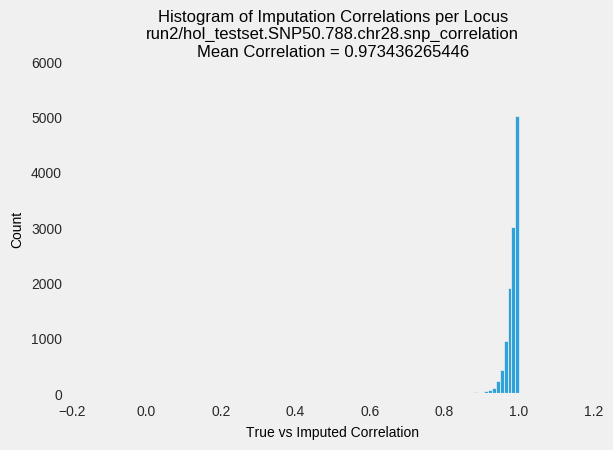

In [46]:
hg = cor.plot.hist(bins = 100)
name = correlations.strip(".csv").strip("/imp_acc/")
hg.set_xlabel('True vs Imputed Correlation', fontdict=label)
hg.set_ylabel('Count', fontdict=label)
hg.set_title("Histogram of Imputation Correlations per Locus\n" + name + '\nMean Correlation = ' + mean, fontdict=title)
hg.grid(False)
hg.legend_.remove()
#plt.savefig("test_histogram.png", format = 'png', bbox_inches = 'tight')


# Concatinating chromosomes and generating genome-wide figure
## Also generate a figure that shows low MAF imputation accuracy

In [227]:
import pandas as pd
import glob
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

corrpath = "./imp_acc/run5/snp50.chr"

interesting_files = glob.glob(corrpath+"*.csv")
df_list = []
for filename in sorted(interesting_files):
    df_list.append(pd.read_csv(filename))
full_df = pd.concat(df_list)
cor =full_df
cor.index = cor['Unnamed: 0']
del cor['Unnamed: 0']
del cor.index.name
cor['correlation']  = abs(cor['correlation'])

In [229]:
corrpath.split('/')[2]

'run5'

In [244]:
frq = "accuracy_test/merged_refs/F250_HD_merged.1970.frq"
mapfile = "accuracy_test/merged_refs/F250_HD_merged.1970.map"

In [245]:
len(cor)

873739

In [246]:
freq = pd.read_table(frq, delim_whitespace=True, usecols= ['CHR', 'SNP', 'MAF'])

In [215]:
freq = pd.read_table(frq, delim_whitespace=True)
del freq['A1'] 
del freq['A2']
del freq['NCHROBS'] 
map = pd.read_table(mapfile, delim_whitespace=True, header=None)
map.columns = ("CHR", "SNP", "CM", "POS")
freq_map_merged = pd.merge(map, freq, on=("SNP","CHR"), how='inner')
freq_map_merged.head()
posmaf = freq_map_merged[["CHR","POS","MAF"]]
posmaf.index = posmaf.CHR.astype(str).str.cat(posmaf.POS.astype(str), sep = ':')
del posmaf.index.name

In [216]:
filter = posmaf["MAF"] <= 0.5
maffiltered = posmaf[filter]

In [217]:
mafcor = cor.join(maffiltered)
mafcor['correlation'].mean()

0.9519533041626096

In [218]:
mafcor.describe()

,correlation,CHR,POS,MAF
count,687290.000000,757567.000000,7.575670e+05,757567.000000
mean,0.951953,12.430842,4.919833e+07,0.235067
std,0.132702,8.083338,3.350869e+07,0.157732
min,0.000007,1.000000,1.062000e+03,0.000000
25%,0.964428,5.000000,2.208348e+07,0.091020
50%,0.981954,11.000000,4.384788e+07,0.240200
75%,0.993898,19.000000,7.094063e+07,0.374550
max,1.000000,29.000000,1.583226e+08,0.500000


### This is the bin plotter for the full MAF spectrum (0 to 0.5)

In [198]:
MAF = mafcor['MAF']
plotter = pd.DataFrame(MAF)
plotter["ACC"] = mafcor["correlation"]
bins = np.linspace(0,.5,100)
plotter_na = plotter[(-2<plotter['ACC']) & (plotter['ACC']<2)]
#print (plotter_na.describe())
a_bins = plotter_na.groupby(pd.cut(plotter_na['MAF'],bins))

In [199]:
mean_bin=a_bins.mean()
del mean_bin.index.name

## Make bins for low MAF Sites for plotting 
* Do I need to filter sites in this dataframe first?

In [200]:
MAF = mafcor['MAF']
plotter = pd.DataFrame(MAF)
plotter["ACC"] = mafcor["correlation"]
bins = np.linspace(0,.5,100)
plotter_na = plotter[(-2<plotter['ACC']) & (plotter['ACC']<2)]
#print (plotter_na.describe())
a_bins = plotter_na.groupby(pd.cut(plotter_na['MAF'],bins))

In [201]:
fixed = mafcor[mafcor.correlation.isnull()&mafcor.MAF.notnull()]

In [226]:
len(fixed)
str(fixed['MAF'].count())

'70496'

In [203]:
mafcor['correlation'].mean()

0.9519533041626096

In [224]:
name = str(corrpath.split('/')[-1].split('.')[0])
run = str(corrpath.split('/')[2])
total_sites = str(len(cor))

x = [name, run, total_sites, imp_mean, nfixed, fixedmaf, nlowmaf, lowmafimpacc]

'\t'.join(x)

'snp50\trun5\t873739'

In [204]:
name = corrpath.split('/')[-1].split('.')[0]
run = corrpath.split('/')[2]

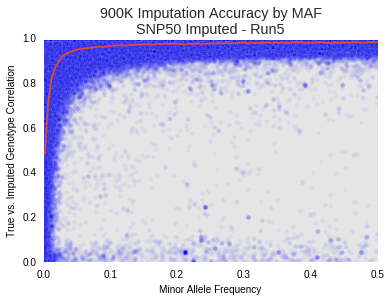

In [231]:
plt.style.use('ggplot')
plt.scatter(mafcor["MAF"], mafcor['correlation'], alpha = 0.05)
plt.plot(mean_bin['MAF'], mean_bin['ACC'])
plt.axis([0,0.5,0,1])
plt.grid(alpha = 0.0)
plt.ylabel('True vs. Imputed Genotype Correlation', fontsize=10, color='k')
plt.xlabel('Minor Allele Frequency', fontsize=10, color='k')
plt.title('900K Imputation Accuracy by MAF\nSNP50 Imputed - Run5')
plt.tick_params(colors='k')
#plt.savefig('test_combo.png')

In [239]:
import datetime
import time
ts = time.time()
st = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
st

'2017-06-14 16:56:43'

In [242]:
import os
path = './imp_acc/run5/f250.chr22.snp_correlations.csv'
ts = os.path.getmtime(path) 
st = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
st

'2017-06-14 14:02:07'

In [206]:
MAF = mafcor['MAF']
plotter = pd.DataFrame(MAF)
plotter["ACC"] = mafcor["correlation"]
bins = np.linspace(0,.1,100)
plotter_na = plotter[(-2<plotter['ACC']) & (plotter['ACC']<2)]
a_bins = plotter_na.groupby(pd.cut(plotter_na['MAF'],bins))
filter = mafcor['MAF'] <= 0.1
mafcor = mafcor[filter]

In [207]:
mafcor.describe()

,correlation,CHR,POS,MAF
count,144112.000000,199901.000000,1.999010e+05,199901.000000
mean,0.850010,12.469227,4.971113e+07,0.030958
std,0.253051,7.967639,3.293148e+07,0.032115
min,0.000007,1.000000,6.351000e+03,0.000000
25%,0.867326,6.000000,2.360059e+07,0.001528
50%,0.950912,12.000000,4.471457e+07,0.018210
75%,0.983513,19.000000,7.117964e+07,0.057940
max,1.000000,29.000000,1.583226e+08,0.100000


In [211]:
mafcor['correlation'].mean()

0.8500103080747229

### Plotting low MAF imputation accuracy

In [ ]:
plt.style.use('ggplot')
plt.scatter(mafcor['MAF'], mafcor['correlation'], alpha = 0.05)
plt.plot(mean_bin['MAF'], mean_bin['ACC'])
plt.axis([0,0.1,0,1])
plt.grid(alpha = 0.0)
plt.ylabel('True vs. Imputed Genotype Correlation', fontsize=10, color='k')
plt.xlabel('Minor Allele Frequency', fontsize=10, color='k')
plt.title('900K Imputation Accuracy by MAF (< 0.10)\n'+ name + ' Imputed - '+ run + ' ' + correlations + 'sites')
plt.tick_params(colors='k')
#plt.savefig('test_combo.png')

In [15]:
MAF = mafcor['MAF']
plotter = pd.DataFrame(MAF)
plotter["ACC"] = mafcor["correlation"]
bins = np.linspace(0,.5,100)
plotter_na = plotter[(-2<plotter['ACC']) & (plotter['ACC']<2)]
print (plotter_na.describe())
a_bins = plotter_na.groupby(pd.cut(plotter_na['MAF'],bins))

NameError: name 'mafcor' is not defined

In [338]:
mean_bin=a_bins.mean()
del mean_bin.index.name

AttributeError: name

,MAF,ACC
"(0, 0.00505]",0.002790,0.737798
"(0.00505, 0.0101]",0.007450,0.781730
"(0.0101, 0.0152]",0.012549,0.840848
"(0.0152, 0.0202]",0.017667,0.882233
"(0.0202, 0.0253]",0.022688,0.905582


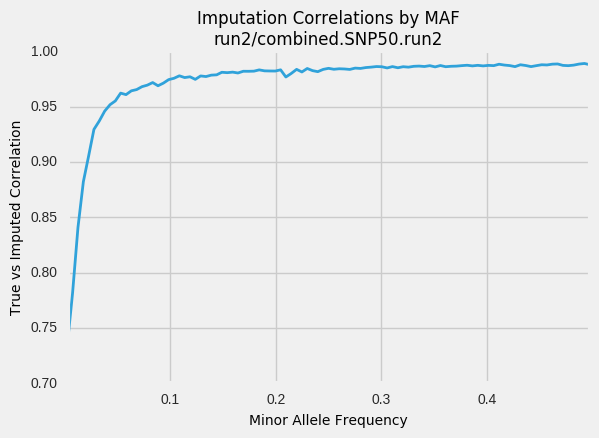

In [324]:
mafline = a_bins.mean().plot(x='MAF',y='ACC', linewidth=2.0)
name = correlations.strip(".snp_correlations.csv").strip("/imp_acc/")
mafline.set_xlabel('Minor Allele Frequency', fontdict=label)
mafline.set_ylabel('True vs Imputed Correlation', fontdict=label)
mafline.set_title("Imputation Correlations by MAF\n"+name,fontdict=title)
mafline.legend_.remove()
#pp.savefig()

In [72]:
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('multipage.pdf')

In [308]:
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess

In [ ]:
line = lowess(mafcor['MAF'], mafcor['correlation'])

In [73]:
pp.close()

# Attempting to subplot these figures

In [110]:
# Setting up Subplot
fig = plt.figure(1)
label = {'family': 'san-serif',
		'color':  'black',
		'weight': 'normal',
		'size': 6,
		}	
title = {'family': 'san-serif',
		'color':  'black',
		'weight': 'normal',
		'size': 8,
		}

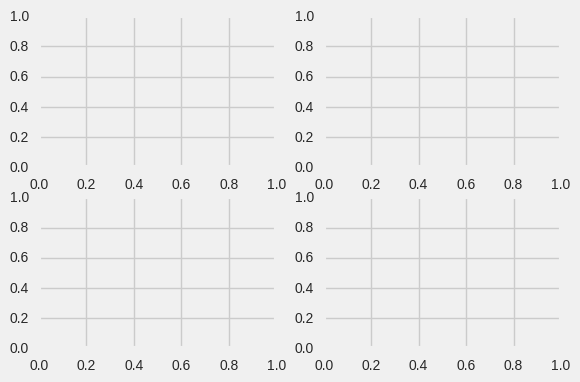

In [111]:
fig, axes = plt.subplots(nrows=2, ncols=2)

In [112]:
hg = cor.plot.hist(bins = 100, ax=axes[0,0])
name = correlations.strip(".snp_correlations.csv").strip("/imp_acc/")
hg.set_xlabel('True vs Imputed Correlation', fontdict=label)
hg.set_ylabel('Count', fontdict=label)
hg.set_title("Histogram of Imputation Correlations per Locus\n" + name + '\nMean Correlation = ' + mean, fontdict=title)
hg.legend_.remove()

In [113]:
mafsp = mafcor.plot.scatter(x = "MAF", y = "correlation", alpha = 0.5, ax=axes[0,1])
name = correlations.strip(".snp_correlations.csv").strip("/imp_acc/")
mafsp.set_xlabel('Minor Allele Frequency', fontdict=label)
mafsp.set_ylabel('True vs Imputed Correlation', fontdict=label)
mafsp.set_title("Histogram of Imputation Correlations per Locus\n"+name, fontdict=title)

In [114]:
mafline = a_bins.mean().plot(x='MAF',y='ACC', linewidth=2.0, ax=axes[1,0])
name = correlations.strip(".snp_correlations.csv").strip("/imp_acc/")
mafline.set_xlabel('Minor Allele Frequency', fontdict=label)
mafline.set_ylabel('True vs Imputed Correlation', fontdict=label)
mafline.set_title("Histogram of Imputation Correlations per Locus\n"+name,fontdict=title)
mafline.legend_.remove()

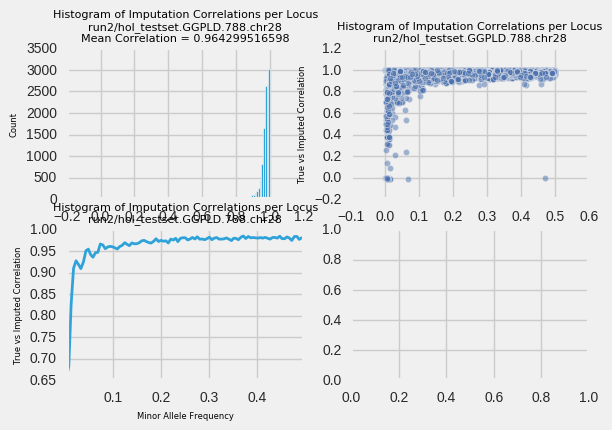

# Concatenate together CSV files with correlations for all chromosomes

In [32]:
corrpath = "./minimac_imp_acc/2/snp50.run2.chr"

In [33]:
import pandas as pd
import glob

corrpath = "./minimac_imp_acc/2/snp50.run2.chr"

interesting_files = glob.glob(corrpath+"*.csv")
df_list = []
for filename in sorted(interesting_files):
    df_list.append(pd.read_csv(filename))
full_df = pd.concat(df_list)
cor =full_df
cor.index = cor['Unnamed: 0']
del cor['Unnamed: 0']
del cor.index.name
cor['correlation']  = abs(cor['correlation'])

In [35]:
cor['correlation']  = abs(cor['correlation'])

In [36]:
cor.mean()

correlation    0.952052
dtype: float64

In [18]:
from itertools import islice
imputed = "impute2_vcf/ggpld.run2.chr28.imputed.vcf"
genskey = {'./.':np.NaN, '0/0':0, '0/1':1 ,'1/1':2}

NameError: name 'np' is not defined

In [76]:
impdict = {}
with open(imputed, "r") as i:
	head = list(islice(i,5))
	impsamples = next(i).strip().split()[9:]
	for line in i:
		splat = line.strip().split()
		cp = (splat[0], splat[1])
		pos = ":".join(cp)
		gen = splat[9:]
		alt = [genskey[p] for p in gen]
		impdict[pos] = alt

In [77]:
impdf = pd.DataFrame.from_dict(impdict, orient='index')

In [19]:
cor.mean()

correlation   -0.935791
dtype: float64

['0/1',
 '0/1',
 '0/1',
 '1/1',
 '1/1',
 './.',
 '1/1',
 '1/1',
 '1/1',
 '0/1',
 '0/1',
 '0/1',
 '0/0',
 '1/1',
 '0/1',
 '0/0',
 '0/0',
 '0/1',
 '1/1',
 '0/1',
 '0/1',
 '1/1',
 '0/1',
 '0/0',
 '1/1',
 '0/0',
 '0/1',
 '1/1',
 '0/1',
 '0/1',
 '1/1',
 '0/1',
 '0/1',
 '0/0',
 '0/1',
 '0/1',
 '1/1',
 '1/1',
 '0/1',
 '0/1',
 '0/0',
 '0/1',
 '0/0',
 '1/1',
 '0/1',
 '1/1',
 '0/1',
 '0/1',
 '0/0',
 '0/1',
 '1/1',
 '0/0',
 '0/1',
 '0/1',
 '1/1',
 '1/1',
 '0/1',
 '0/1',
 '0/0',
 '0/0',
 '0/0',
 '0/1',
 '1/1',
 '0/1',
 '0/1',
 '0/0',
 '1/1',
 '1/1',
 '0/1',
 '1/1',
 '1/1',
 '1/1',
 '0/1',
 '0/1',
 '0/0',
 '0/0',
 '1/1',
 '1/1',
 '1/1',
 '0/1',
 '1/1',
 '0/1',
 '1/1',
 '0/1',
 '0/1',
 '0/1',
 '0/0',
 '0/1',
 '0/1',
 '0/1',
 '0/1',
 './.',
 '0/1',
 '1/1',
 '1/1',
 '1/1',
 '0/1',
 '1/1',
 '0/1',
 '1/1',
 '0/0',
 '0/0',
 '0/1',
 '1/1',
 '0/1',
 '0/1',
 '0/1',
 '0/0',
 '0/0',
 '1/1',
 '0/0',
 '0/0',
 '0/0',
 '0/1',
 '0/1',
 '0/0',
 '0/1',
 '0/0',
 '0/1',
 '0/1',
 '0/0',
 '0/1',
 '1/1',
 '0/1',
 '1/1',


In [7]:
DATA =['f250', 'ggpld', 'hd', 'snp50']
from itertools import tee
def parwise(iterable):
	a,b = tee(iterable)
	next(b, None)
	return zip(a,b)
def chunks(end):
	return [str(i[0]+1)+ ' ' + str(i[1]) for i in parwise(range(0,end,5000000))]
rangedict = {'1':chunks(158322647),'2':chunks(136914030),'3':chunks(121412973), '4':chunks(120786530), '5':chunks(121186724), '6':chunks(119454666), '7':chunks(112628884), '8':chunks(113380773), '9':chunks(105701306), '10':chunks(104301732), '11':chunks(107282960), '12':chunks(91155612), '13':chunks(84230359), '14':chunks(84628243), '15':chunks(85272311), '16':chunks(81720984), '17':chunks(75149392), '18':chunks(65999195), '19':chunks(64044783), '20':chunks(71992748), '21':chunks(71594139), '22':chunks(61379134), '23':chunks(52467978), '24':chunks(62685898), '25':chunks(43879707), '26':chunks(51680135), '27':chunks(45402893), '28':chunks(46267578), '29':chunks(51504286)} #, '30':chunks(143032828)}

In [8]:
# This dict needs to be able to reference run and chromosome NOT 

In [9]:
rundict = {}
for Run in range(15):
	run= str(Run)
	filedict = {}
	for chr in rangedict.keys():
		chunkcounter=-1
		flist = []
		for chunk in rangedict.get(chr):
			chunkcounter = chunkcounter+1
			file = 'minimac_ref_panel/ref_panel_chunks_vcf/run'+ run + '/merged_refpanel.chr'+chr+'.'+str(chunkcounter)+'.phased.vcf' #need to edit this to accept run as a wildcard
			flist.append(file)
			filedict[chr]=flist
	rundict[run] = filedict

def chrfiles(chrom):
	return rundict[chrom.run][chrom.chr]


In [11]:
rundict['5']['28']

['minimac_ref_panel/ref_panel_chunks_vcf/run5/merged_refpanel.chr28.0.phased.vcf',
 'minimac_ref_panel/ref_panel_chunks_vcf/run5/merged_refpanel.chr28.1.phased.vcf',
 'minimac_ref_panel/ref_panel_chunks_vcf/run5/merged_refpanel.chr28.2.phased.vcf',
 'minimac_ref_panel/ref_panel_chunks_vcf/run5/merged_refpanel.chr28.3.phased.vcf',
 'minimac_ref_panel/ref_panel_chunks_vcf/run5/merged_refpanel.chr28.4.phased.vcf',
 'minimac_ref_panel/ref_panel_chunks_vcf/run5/merged_refpanel.chr28.5.phased.vcf',
 'minimac_ref_panel/ref_panel_chunks_vcf/run5/merged_refpanel.chr28.6.phased.vcf',
 'minimac_ref_panel/ref_panel_chunks_vcf/run5/merged_refpanel.chr28.7.phased.vcf',
 'minimac_ref_panel/ref_panel_chunks_vcf/run5/merged_refpanel.chr28.8.phased.vcf']

In [5]:
IMPREFS = ['hd', 'f250']

haps_sample_run = {'5': 'eagle_phased_assays'}
haps_location = {'eagle_phased_assays':'2'}
loc = []
for xx in IMPREFS:
	t = '5'
	samp = xx
	chrom = '28'
	location = haps_sample_run[t] + '/run' + haps_location[haps_sample_run[t]] + '/'+ samp  +'.chr' + chrom + '.phased.sample'
	loc.append(location)


In [6]:
loc

['eagle_phased_assays/run2/hd.chr28.phased.sample',
 'eagle_phased_assays/run2/f250.chr28.phased.sample']

In [30]:
haps_sample_run = {'1': 'vcf_to_haps', '2': 'eagle_phased_assays', '4':'shapeit_phased_assays'}
haplegendsample_run = {'1':'vcf_to_hap', '2':'impute_input', '4':'shapeit_phased_assays/impute_input'}

def haps_runlocator(shoein):
    loc = []
    for xx in IMPREFS:
        t = shoein.run
        samp = xx
        chrom = shoein.chr
        location = haps_sample_run[t] + '/run' + t + '/'+ samp  +'.chr' + chrom + '.phased.haps'
        loc.append(location)
    #print(location)
    return location

In [35]:
loc = []
for xx in IMPREFS:
    t = '2'
    samp = xx
    chrom = '28'
    location = haps_sample_run[t] + '/run' + t + '/'+ samp  +'.chr' + chrom + '.phased.haps'
    loc.append(location)

# Determine why Minimac Imputation Accuracies are negative.  

In [25]:
true = "ref_vcfs/F250_HD_merged.chr28.pickle"
imputed = "minimac_imputed/run5/snp50.chr28.imputed.dose.vcf"

In [26]:
import pandas as pd
import numpy as np
from itertools import islice


truedf = pd.read_pickle(true)
impdict = {}

with open(imputed, 'r') as i:
    head = list(islice(i,10))
    impsamples = next(i).strip().split()[9:]
    for line in i:
        splat = line.strip().split()
        pos = splat[2]
        gen = splat[9:]
        alt = [float(xx.split(":")[1]) for xx in gen]
        impdict[pos] = alt
impdf = pd.DataFrame.from_dict(impdict, orient='index')
impdf.columns = impsamples

corrs=impdf.corrwith(truedf, axis = 1)
cor = pd.DataFrame(corrs)
cor = cor.rename(index=str, columns={0:"correlation"})

### Seeing negative correlations when calculating with Minimac versus positive correlations when we do the same calculations with Impute2.
* These accuracies are likely correct, but there may be some sort of allele flipping going on that causes them to have a negative in front of them

In [27]:
cor.head() 

,correlation
28:1000124,-0.971301
28:10003452,-0.964258
28:10007646,-0.969143
28:10012243,NaN
28:10027414,-0.964591


In [47]:
overlap = truedf[list(impdf.columns)]

In [57]:
overlap.sort_index().head()

,UMCUSAF000000078915,UMCUSAM000000078648,UMCUSAF000000087198,UMCUSAF000000079749,UMCUSAF000000079193,UMCUSAF000000086880,UMCUSAF000000080261,UMCUSAM000000079479,UMCUSAF000000078916,UMCUSAF000000078649,...,UMCUSAF000000086863,UMCUSAM000000079746,UMCUSAM000000079476,UMCUSAF000000086868,UMCUSAM000000079748,UMCUSAM000000079478,UMCUSAF000000086869,UMCUSAF000000086870,UMCUSAF000000086873,UMCUSAF000000086879
28:1000124,0.0,2.0,1.0,2.0,1.0,2.0,0.0,1.0,1.0,0.0,...,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0
28:10003452,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,...,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0
28:10007646,1.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
28:10012243,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
28:10027414,1.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [58]:
impdf.sort_index().head()

,UMCUSAF000000078915,UMCUSAM000000078648,UMCUSAF000000087198,UMCUSAF000000079749,UMCUSAF000000079193,UMCUSAF000000086880,UMCUSAF000000080261,UMCUSAM000000079479,UMCUSAF000000078916,UMCUSAF000000078649,...,UMCUSAF000000086863,UMCUSAM000000079746,UMCUSAM000000079476,UMCUSAF000000086868,UMCUSAM000000079748,UMCUSAM000000079478,UMCUSAF000000086869,UMCUSAF000000086870,UMCUSAF000000086873,UMCUSAF000000086879
28:1000124,1.999,0.000,1.0,0.000,1.0,0.015,1.999,1.0,1.000,1.999,...,0.000,1.000,1.000,0.0,0.0,1.000,0.000,0.948,1.000,0.032
28:10003452,0.001,0.002,1.0,0.007,0.0,0.971,0.000,0.0,0.001,0.000,...,1.003,0.000,0.054,1.0,0.0,0.001,1.013,0.251,0.999,0.988
28:10007646,1.000,0.003,2.0,0.910,2.0,1.995,2.000,1.0,1.999,2.000,...,1.995,1.001,0.057,2.0,1.0,2.000,1.995,0.326,1.000,1.992
28:10012243,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.0,0.000,0.000,...,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000
28:10027414,0.999,0.003,2.0,0.913,2.0,1.993,1.000,1.0,1.999,1.000,...,1.994,1.000,0.055,2.0,1.0,2.000,1.994,0.316,1.000,1.990


### Pretty clearly looks like this is just a case of the ref alt alleles being flipped between true and Minimac imputed.  Alternate allele count is opposite for everything. 

In [61]:
!head minimac_imputed/run5/snp50.chr28.imputed.vcf

head: cannot open `minimac_imputed/run5/snp50.chr28.imputed.vcf' for reading: No such file or directory


NameError: name 'ref_vcfs' is not defined